In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!ls '/content/drive/MyDrive/Computer_Vision/'

Mounted at /content/drive
CameraCalibration.ipynb  Datasets		 Files
CorrectDistortion.ipynb  EpipolarGeometry.ipynb


# <i><b><font color='blue'> I - Radial Distorion: barrel(-) & pincushion(+) </font></b></i>

\begin{gather}
    M_{dist} = 
    \begin{bmatrix}
        md_{x} \\
        md_{y} \\
    \end{bmatrix}
    = ( 1 \pm k_{d} * || M ||^{2} ) * 
    \begin{bmatrix}
        m_{x} \\
        m_{y} \\
    \end{bmatrix}
\end{gather}

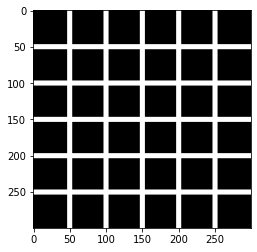

In [18]:
import numpy as np
import matplotlib.pyplot as plt

H, W = 300, 300
image = np.zeros( (H, W) )

for wi in range( 1, 6 ):
    for h in range(H):
        for m in range(-3,4):
            image[h,(W//6)*wi+m] = 255

for hi in range( 1, 6 ):
    for w in range(W):
        for m in range(-3,4):
            image[(H//6)*hi+m, w] = 255


plt.imshow( image, cmap='gray' )

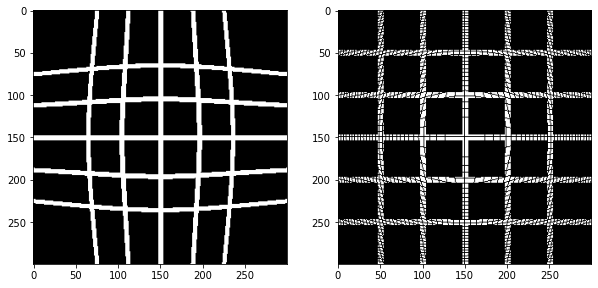

In [65]:
from math import sqrt

def sign( n ):
    if n == 0: return 1
    else: return int( n/abs(n) )

def f_dist( mx, my, k : list ):
    mnorm = sqrt( mx**2 + my**2 ) 
    factor = 1
    for i in range( len(k)):   
        factor +=  k[i] * mnorm ** (i+1)
    return  factor * mx, factor * my


def distortion( image, kd ):
    H, W = image.shape  
    tmp = np.zeros( (H,W) )
    for h in range( -H//2, H//2):
        for w in range( -W//2, W//2):
            hd, wd = f_dist( h, w, kd )
            hd = int( min( max( 0, hd + H//2 ), H-1))
            wd = int( min( max( 0, wd + W//2 ), W-1))
            tmp[ h + H//2, w + W//2] = image[hd, wd]
    return tmp


def inv_distortion( image, kd ):
    H, W = image.shape  
    tmp = np.zeros( (H,W) )
    for h in range( -H//2, H//2):
        for w in range( -W//2, W//2):
            hd, wd = f_dist( h, w, kd )
            hd = int( min( max( 0, hd + H//2 ), H-1))
            wd = int( min( max( 0, wd + W//2 ), W-1))
            tmp[hd, wd] = image[ h + H//2, w + W//2]
    return tmp


kd = [ 0.002, -0.0, -0.0 ]
tmp1 = distortion( image, kd)
tmp2 = inv_distortion( tmp1, kd)

plt.figure( figsize=(10, 5) )
plt.subplot( 1,2,1 )
plt.imshow( tmp1, cmap='gray' )
plt.subplot( 1,2,2 )
plt.imshow( tmp2, cmap='gray' )
plt.show()

# <i><b><font color='blue'> II - Frame Transfromation </font></b></i>